## Geometric Random Walk/ Brownian Motion
https://github.com/hardikroutray/QuantitativeFinance/blob/main/RandomWalks.ipynb

### dS = $\mu$ S dt + $\sigma$ S dW 

where

#### dS = S(t + dt) - S(t)  
#### $\mu$ S dt = Deterministic part 
#### $\sigma$ S dW = Stochastic part where W is a random walk (Weiner process/Brownian motion)
#### dW ~ N(0, dt)

In [5]:
import numpy.random as npr
import numpy as np
import matplotlib.pyplot as plt

### Implement Weiner process

In [9]:
def wiener_process(dt=0.1, x0=0, n=1000):

    # W(t=0)=0
    # initialize W(t) with zeros
    W = np.zeros(n+1)

    # we create N+1 timesteps: t=0,1,2,3...N
    t = np.linspace(x0, n, n+1)

    # we have to use cumulative sum: on every step the additional value is
    # drawn from a normal distribution with mean 0 and variance dt ... N(0,dt)
    # by the way: N(0,dt) = sqrt(dt)*N(0,1) usually this formula is used !!!
    W[1:n+1] = np.cumsum(np.random.normal(0, np.sqrt(dt), n))

    return t, W


def plot_process(t, W):
    fig = plt.figure(figsize=(15,8))
    plt.plot(t, W)
    plt.xlabel('Time(t)')
    plt.ylabel('Wiener-process W(t)')
    plt.title('Wiener-process')
    plt.show()

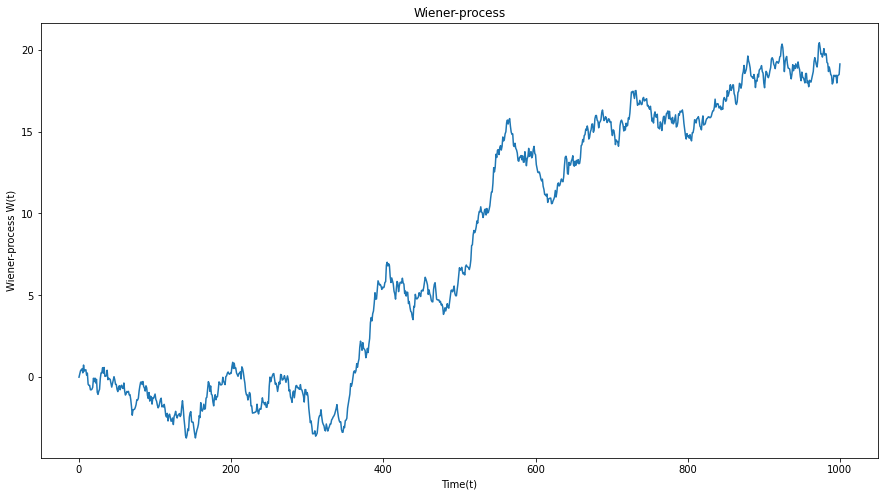

In [10]:
time, data = wiener_process()
plot_process(time, data)

### Weiner process results in negative prices, hence the need for geometric random walk by adding deterministic part containing a mean

### Ito's lemma: The derivative of stochastic random variable as opposed to deterministic random variable contain an extra term from taylor expansion

### d F(X) = $\frac{d F(X)}{d X}$ dX + $\frac{1}{2}$ $\frac{d^{2} F(X)}{d X ^{2}}$ dX$^{2}$
where 
### dX$^{2}$ = dt if X is a Weiner process because dX ~ N(0, dt)


### Using the above information we can solve the geometric random walk

### dS = $\mu$ S dt + $\sigma$ S dW => d (log S) = $\mu$ dt + $\sigma$ dW 

### d F(S) = $\frac{1}{S}$ dS - $\frac{1}{2}$ $\frac{1}{S ^{2}}$ dS$^{2}$ = $\frac{1}{S}$ ($\mu$ S dt + $\sigma$ S dW )  - $\frac{1}{2}$ $\frac{1}{S ^{2}}$ $\sigma^{2}$ S$^{2}$ dt = ($\mu$  - $\frac{1}{2}$ $\sigma^{2}$ ) dt + $\sigma$ dW

### S(t) = S(0) $e^{ (\mu  - \frac{1}{2} \sigma^{2} ) t + \sigma W}$ 

In [15]:
def simulate_geometric_random_walk(S0, T=2, N=1000, mu=0.1, sigma=0.05):

    dt = T/N
    t = np.linspace(0, T, N)
    # standard normal distribution N(0,1)
    W = np.random.standard_normal(size=N)
    # N(0,dt) = sqrt(dt) * N(0,1)
    W = np.cumsum(W) * np.sqrt(dt)
    X = (mu - 0.5 * sigma ** 2) * t + sigma * W
    S = S0 * np.exp(X)

    return t, S


def plot_simulation(t, S):
    fig = plt.figure(figsize=(15,8))
    plt.plot(t, S)
    plt.xlabel('Time (t)')
    plt.ylabel('Stock Price S(t)')
    plt.title('Geometric Brownian Motion')
    plt.show()

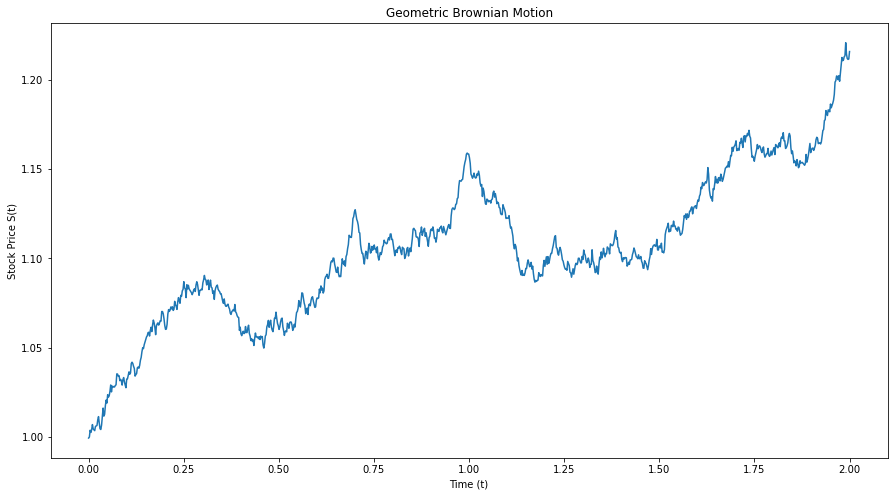

In [18]:
time, data = simulate_geometric_random_walk(1)
plot_simulation(time, data)